<a href="https://colab.research.google.com/github/Jonathan57000/IAE_METZ_DATA/blob/main/Analyse_de_3_actions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Collecte des données financières

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [11]:
#comparaison de 3 actifs
Apple='AAPL'
asml = 'ASML'
TSMC='2330.TW' #Taiwan Semiconductor Manufacturing Company
Nasdaq="NQ=F"

In [12]:
#time frame
start_date = "2015-01-01"
end_date = "2025-01-01"

In [13]:
#téléchargement des données historiquess avec yahoo finance
apple_data = yf.download(Apple, start=start_date, end=end_date)
asml_data = yf.download(asml, start=start_date, end=end_date)
tsmc_data = yf.download(TSMC, start=start_date, end=end_date)

nasdaq_data=yf.download ("NQ=F", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


#Mise en forme des données

In [ ]:
apple_data.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320435,24.789804,23.879983,24.778681,212818400
2015-01-05,23.635286,24.169166,23.448429,24.089084,257142000
2015-01-06,23.637510,23.897776,23.274916,23.699796,263188400
2015-01-07,23.968962,24.069063,23.735389,23.846614,160423600
2015-01-08,24.889898,24.947736,24.180283,24.298183,237458000


In [23]:
# Calcul des rendements journaliers
apple_daily = apple_data.pct_change().dropna()

# Calcul de la rentabilité annualisée
apple_mean_daily_return = apple_daily["Close"].mean()  # Rendement moyen journalier
apple_annualized_return = (1 + apple_mean_daily_return) ** 252 - 1  # Annualisation

print(apple_annualized_return)

Ticker
AAPL    0.315203
dtype: float64


In [24]:
# Calcul des rendements journaliers
asml_daily = asml_data.pct_change().dropna()

# Calcul de la rentabilité annualisée
asml_mean_daily_return = asml_daily["Close"].mean()  # Rendement moyen journalier
asml_annualized_return = (1 + asml_mean_daily_return) ** 252 - 1  # Annualisation

print(asml_annualized_return)

Ticker
ASML    0.302489
dtype: float64


In [25]:
# Calcul des rendements journaliers
tsmc_daily = tsmc_data.pct_change().dropna()

# Calcul de la rentabilité annualisée
tsmc_mean_daily_return = tsmc_daily["Close"].mean()  # Rendement moyen journalier
tsmc_annualized_return = (1 + tsmc_mean_daily_return) ** 252 - 1  # Annualisation

print(tsmc_annualized_return)

Ticker
2330.TW    0.317474
dtype: float64


In [ ]:
#Calculate daily returns
apple_data["Daily_Return"]=apple_data["Close"].pct_change()
#display the first few rows of the data frale
apple_data[['Close','Daily_Return']].head()

Price,Close,Daily_Return
Ticker,AAPL,
Date,,
2015-01-02,24.320435,NaN
2015-01-05,23.635286,-0.028172
2015-01-06,23.637510,0.000094
2015-01-07,23.968962,0.014022
2015-01-08,24.889898,0.038422


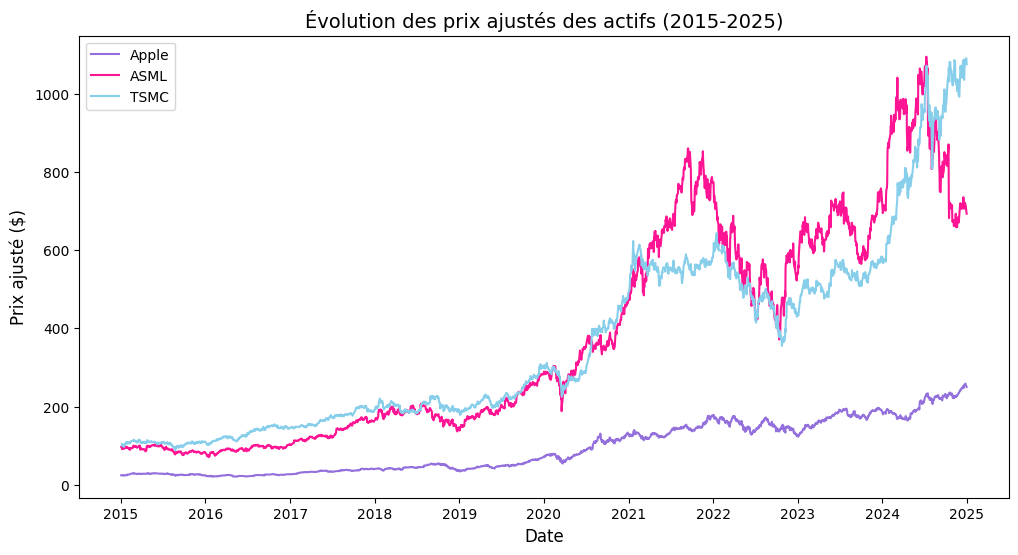

In [16]:

#tracer l'évolution des prix ajustés
plt.figure(figsize=(12, 6))
plt.plot(apple_data ["Close"], label="Apple", color="mediumpurple")
plt.plot(asml_data ["Close"], label="ASML", color="deeppink")
plt.plot(tsmc_data ["Close"], label="TSMC", color="skyblue")

#ajouter des titres et labels
plt.title("Évolution des prix ajustés des actifs (2015-2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Prix ajusté ($)", fontsize=12)
plt.legend()
plt.show()

In [17]:
#calcul des rendements quotidiens pour chacun des actifs
apple_returns = apple_data.pct_change().dropna()
asml_returns = asml_data.pct_change().dropna()
tsmc_returns = tsmc_data.pct_change().dropna()
nasdaq_returns = nasdaq_data.pct_change().dropna()
print(apple_returns)

Price          Close      High       Low      Open    Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL
Date                                                        
2015-01-05 -0.028172 -0.025036 -0.018072 -0.027830  0.208270
2015-01-06  0.000094 -0.011229 -0.007400 -0.016160  0.023514
2015-01-07  0.014022  0.007167  0.019784  0.006195 -0.390461
2015-01-08  0.038422  0.036507  0.018744  0.018937  0.480194
2015-01-09  0.001072  0.009808  0.013891  0.031493 -0.095427
...              ...       ...       ...       ...       ...
2024-12-24  0.011478  0.010014  0.007260  0.002826 -0.431342
2024-12-26  0.003176  0.007320  0.009166  0.010568  0.172260
2024-12-27 -0.013242 -0.005382 -0.017739 -0.001394  0.555059
2024-12-30 -0.013263 -0.020101 -0.009128 -0.021720 -0.160495
2024-12-31 -0.007058 -0.000868 -0.005264  0.000833  0.110334

[2515 rows x 5 columns]


In [19]:
#calcul de la rentabilité cumulée des actifs sur une période
apple_cumulative_return=(1+apple_returns).cumprod()-1
asml_return=(1+asml_returns).cumprod()-1
tsmc_cumulative_return=(1+tsmc_returns).cumprod()-1
print(apple_cumulative_return)

Price          Close      High       Low      Open    Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL
Date                                                        
2015-01-05 -0.028172 -0.025036 -0.018072 -0.027830  0.208270
2015-01-06 -0.028080 -0.035983 -0.025338 -0.043541  0.236681
2015-01-07 -0.014452 -0.029074 -0.006055 -0.037616 -0.246195
2015-01-08  0.023415  0.006371  0.012576 -0.019391  0.115778
2015-01-09  0.024513  0.016242  0.026642  0.011491  0.009302
...              ...       ...       ...       ...       ...
2024-12-24  9.604928  9.404537  9.678803  9.299557 -0.890824
2024-12-26  9.638606  9.480694  9.776685  9.408401 -0.872017
2024-12-27  9.497728  9.424282  9.585522  9.393889 -0.800979
2024-12-30  9.358493  9.214749  9.488895  9.168136 -0.832921
2024-12-31  9.285383  9.205884  9.433679  9.176602 -0.814486

[2515 rows x 5 columns]


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


#Mise en portefeuille


In [ ]:
ticker=["AAPL",'NOVO-B.CO','2330.TW']
portefeuille = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  3 of 3 completed


In [ ]:
#calcul de la rentabilité du portefeuille
portefeuille_return= portefeuille.pct_change().dropna()
print (portefeuille_return)

Price          Close                          High                      \
Ticker       2330.TW      AAPL NOVO-B.CO   2330.TW      AAPL NOVO-B.CO   
Date                                                                     
2015-01-06 -0.043011  0.000094 -0.006775 -0.021352 -0.011229 -0.004120   
2015-01-07  0.003745  0.014022  0.002653 -0.018182  0.007168  0.001880   
2015-01-08  0.029851  0.038422  0.019652  0.022222  0.036506  0.016892   
2015-01-09 -0.028985  0.001073  0.003706 -0.018116  0.009809  0.006275   
2015-01-12 -0.014925 -0.024641  0.013663 -0.014760 -0.005475  0.007704   
...              ...       ...       ...       ...       ...       ...   
2024-12-25  0.004630  0.000000  0.000000 -0.004566  0.000000  0.000000   
2024-12-26  0.000000  0.003176  0.000000  0.000000  0.007320  0.000000   
2024-12-27  0.004608 -0.013242  0.021362  0.004587 -0.005382 -0.005086   
2024-12-30  0.000000 -0.013263 -0.018399  0.000000 -0.020101 -0.012392   
2024-12-31 -0.013761 -0.007058  0.0000

<ipython-input-33-1e2eee6ef6a4>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  portefeuille_return= portefeuille.pct_change().dropna()


#Information sur les actifs

In [ ]:
pip install yfinance

In [3]:
apple=yf.Ticker("AAPL")
asml=yf.Ticker("ASML")
tsmc=yf.Ticker("2330.TW")

In [ ]:
apple.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

In [4]:
asml.info

{'address1': 'De Run 6501',
 'city': 'Veldhoven',
 'zip': '5504 DR',
 'country': 'Netherlands',
 'phone': '31 40 268 3938',
 'website': 'https://www.asml.com',
 'industry': 'Semiconductor Equipment & Materials',
 'industryKey': 'semiconductor-equipment-materials',
 'industryDisp': 'Semiconductor Equipment & Materials',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'ASML Holding N.V. provides lithography solutions for the development, production, marketing, sales, upgrading, and servicing of advanced semiconductor equipment systems. It offers lithography, metrology, and inspection systems. The company also provides extreme ultraviolet lithography systems; and deep ultraviolet lithography systems comprising immersion and dry lithography systems solutions to manufacture various range of semiconductor nodes and technologies. In addition, it offers metrology and inspection systems, including YieldStar optical metrology systems to a

In [5]:
tsmc.info

{'address1': 'Hsinchu Science Park',
 'address2': 'No. 8, Li-Hsin Road 6',
 'city': 'Hsinchu City',
 'zip': '300096',
 'country': 'Taiwan',
 'phone': '886 3 563 6688',
 'fax': '886 3 563 7000',
 'website': 'https://www.tsmc.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Taiwan Semiconductor Manufacturing Company Limited, together with its subsidiaries, manufactures, packages, tests, and sells integrated circuits and other semiconductor devices in Taiwan, China, Europe, the Middle East, Africa, Japan, the United States, and internationally. It provides various wafer fabrication processes, such as processes to manufacture complementary metal- oxide-semiconductor (CMOS) logic, mixed-signal, radio frequency, embedded memory, bipolar CMOS mixed-signal, and others. The company also offers customer and engineering support service

In [ ]:
apple_hist=apple.history(period="10y")
novo_hist=novo.history(period="10y")
tsmc_hist=tsmc.history(period="10y")

In [ ]:
apple_holder=apple.major_holders
novo_holder=novo.major_holders
tsmc_holder=tsmc.major_holders

In [ ]:
apple_holder

Breakdown,Value
insidersPercentHeld,0.02268
institutionsPercentHeld,0.62777
institutionsFloatPercentHeld,0.64234
institutionsCount,6986.00000


In [8]:
apple_institutional_holders=apple.institutional_holders
asml_institutional_holders=asml.institutional_holders
tsmc_institutional_holders=tsmc.institutional_holders

In [10]:
asml_institutional_holders

,Date Reported,Holder,pctHeld,Shares,Value,pctChange
0,2024-12-31,Capital World Investors,0.0117,4599999,3162959200,-0.2206
1,2024-12-31,Capital International Investors,0.0087,3432077,2359896061,-0.0504
2,2024-12-31,"FMR, LLC",0.0085,3354140,2306306582,-0.1565
3,2024-12-31,Edgewood Management Llc,0.0081,3186667,2191152151,0.4309
4,2024-12-31,"Fisher Asset Management, LLC",0.0080,3162286,2174387776,-0.0075
5,2024-12-31,Price (T.Rowe) Associates Inc,0.0074,2918871,2007015628,-0.1740
6,2024-12-31,State Farm Mutual Automobile Insurance Co,0.0070,2758173,1896519687,0.0000
7,2024-12-31,Morgan Stanley,0.0068,2677445,1841011116,0.4673
8,2024-12-31,JP Morgan Chase & Company,0.0066,2588600,1779921296,0.8203
9,2024-12-31,Van Eck Associates Corporation,0.0045,1788280,1229621284,0.0178


In [ ]:
aplle_recco=apple.recommendations
novo_recco=novo.recommendations
tsmc_recco=tsmc.recommendations

In [ ]:
aplle_recco

,period,strongBuy,buy,hold,sell,strongSell
0,0m,7,21,13,2,2
1,-1m,7,21,13,2,2
2,-2m,8,21,13,2,2
3,-3m,8,24,12,1,2


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

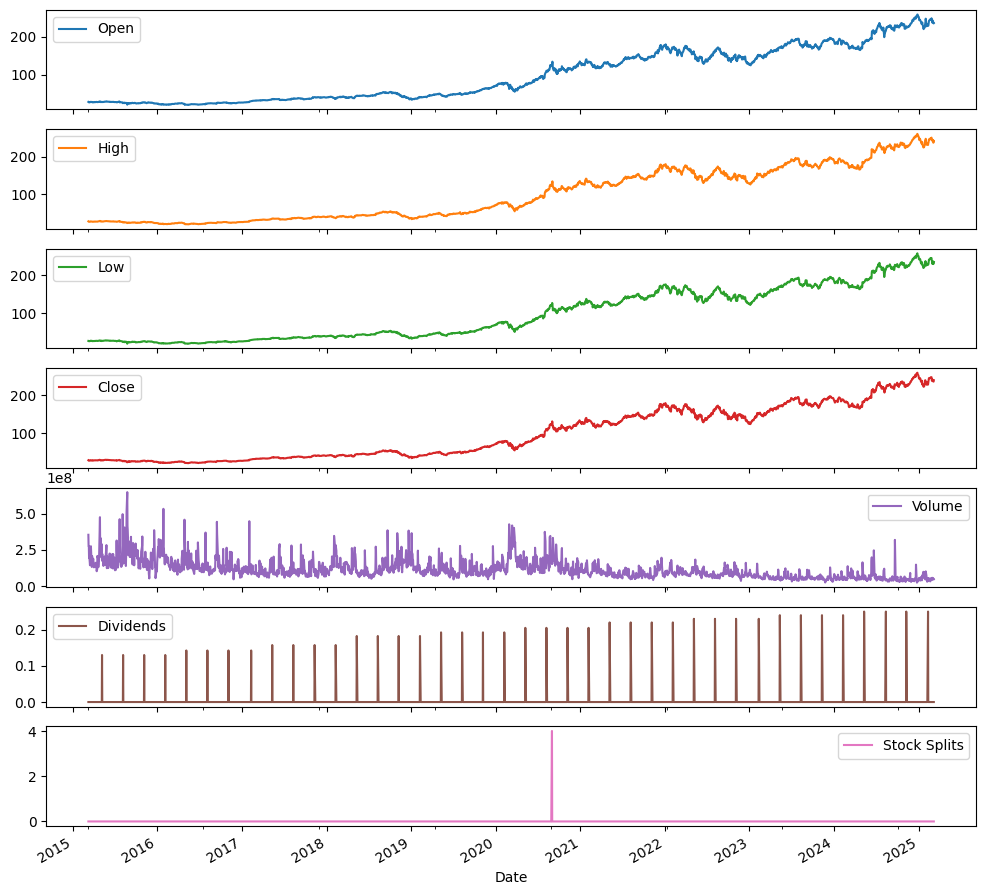

In [ ]:
apple_hist.plot(kind="line", figsize=(12,12),subplots=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

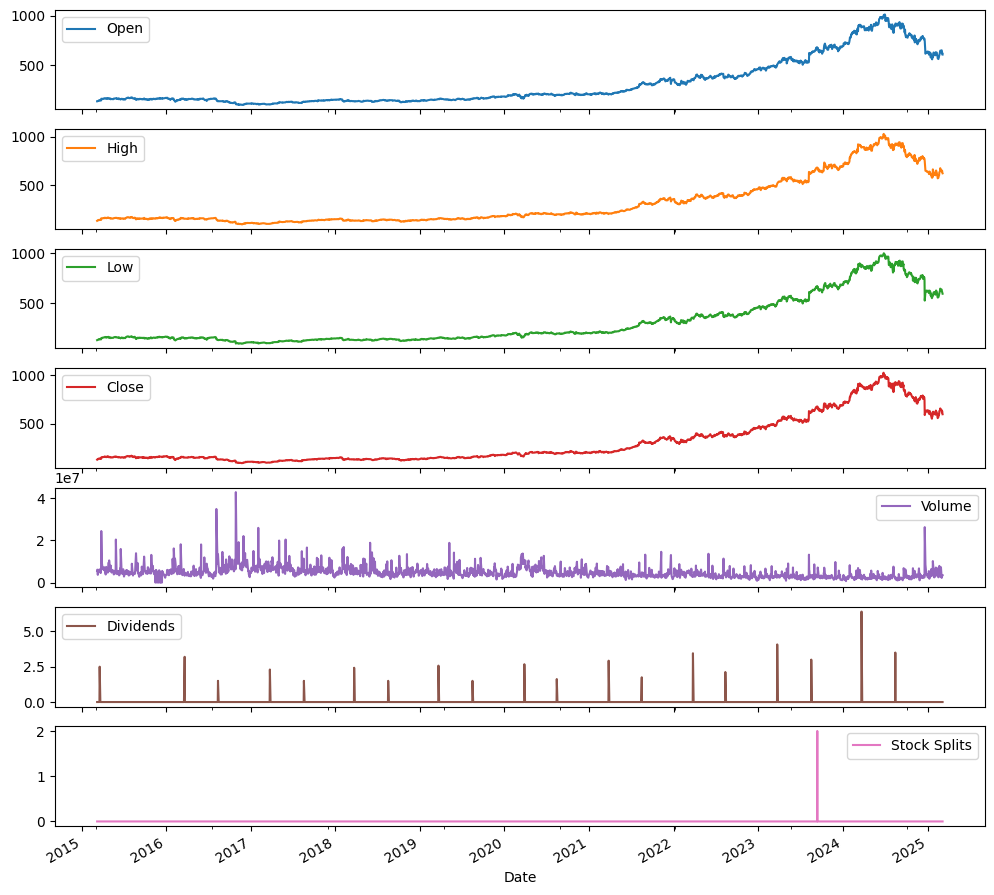

In [ ]:
novo_hist.plot(kind="line", figsize=(12,12),subplots=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

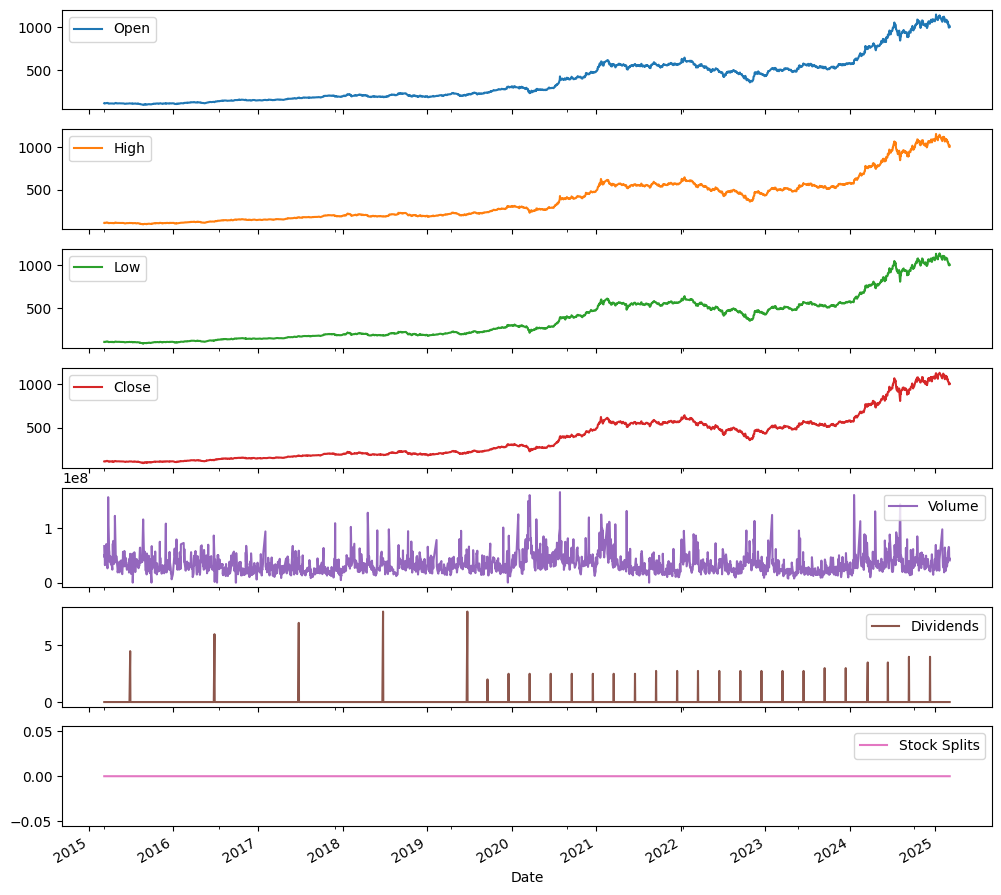

In [ ]:
tsmc_hist.plot(kind="line", figsize=(12,12),subplots=True)

In [ ]:
# Assume risk-free rate is 0.02 (2%)
risk_free_rate = 0.02

# Calculate annualized return for APPLE
apple_annualized_return = apple_returns.mean() * 252

# Calculate annualized standard deviation for APPLE
apple_sd = apple_returns.std() * np.sqrt(252)

# Calculate Sharpe Ratio
apple_sharpe_ratio = (apple_annualized_return - risk_free_rate) / apple_sd


novo_annualized_return = novo_nordisk_returns.mean() * 252
novo_sd = novo_nordisk_returns.std() * np.sqrt(252)
novo_sharpe_ratio = (novo_annualized_return - risk_free_rate) / novo_sd
print(novo_sharpe_ratio)

tsmc_annualized_return = tsmc_returns.mean() * 252
tsmc_sd = tsmc_returns.std() * np.sqrt(252)
tsmc_sharpe_ratio = (tsmc_annualized_return - risk_free_rate) / tsmc_sd


Price   Ticker   
Close   NOVO-B.CO    0.696073
High    NOVO-B.CO    0.748257
Low     NOVO-B.CO    0.686348
Open    NOVO-B.CO    0.679775
Volume  NOVO-B.CO    0.634757
dtype: float64


In [ ]:
#calcul beta
# Calcul de la covariance entre l'action et le marché
covariance = np.cov(apple_returns, nasdaq_returns)[0, 1]

# Calcul de la variance du marché
variance_marche = np.var(nasdaq_returns, ddof=1)

# Calcul du Bêta
beta = covariance / variance_marche
print(f"Bêta de l'action : {beta}")

Bêta de l'action : Price   Ticker
Close   NQ=F       7.903282
High    NQ=F      13.827357
Low     NQ=F       9.395587
Open    NQ=F       7.735741
Volume  NQ=F            NaN
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
